# Download image with annotation by ID and draw labels masks

In [32]:
import supervisely_lib as sly  # Supervisely Python SDK
import numpy as np

# Matplotlib for rendering images in Jupyter.
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
# Initialize API and label color
api = sly.Api.from_env()
label_color = [255, 255, 255]

In [34]:
# Get image and annotation from API
project_id = 11509
image_id = 3014217

meta_json = api.project.get_meta(project_id)
meta = sly.ProjectMeta.from_json(meta_json)

ann_info = api.annotation.download(image_id)
ann = sly.Annotation.from_json(ann_info.annotation, meta)

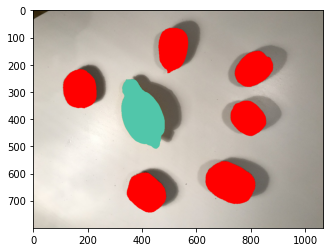

In [35]:
fig = plt.figure(figsize=(20, 20))

# Draw Annotation on image
img = api.image.download_np(image_id)
ann.draw(img)

fig.add_subplot(1, 1, 1)
plt.imshow(img)
plt.show()
# sly.image.write("./images/img.png", img) # uncomment to save image to disk

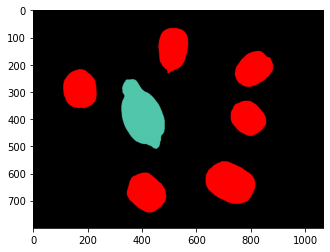

In [39]:
# Draw annotation mask
mask = np.zeros(shape=img.shape)
ann.draw(mask)

fig.add_subplot(1, 1, 1)
plt.imshow(mask / 255)
plt.show()
# sly.image.write("./images/mask.png", mask) # uncomment to save image to disk

Drawing object of class: lemon


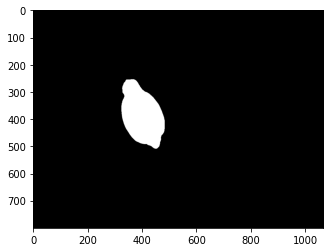

Drawing object of class: kiwi


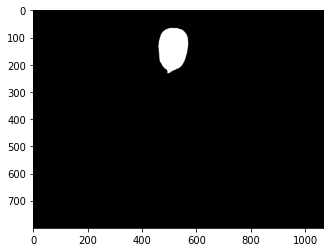

Drawing object of class: kiwi


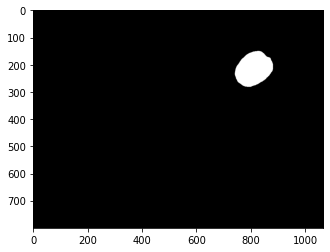

Drawing object of class: kiwi


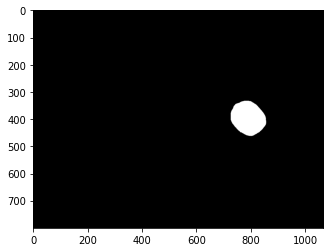

Drawing object of class: kiwi


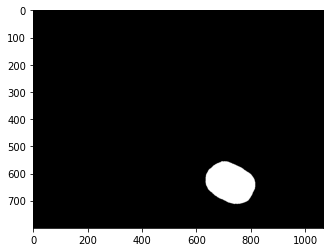

Drawing object of class: kiwi


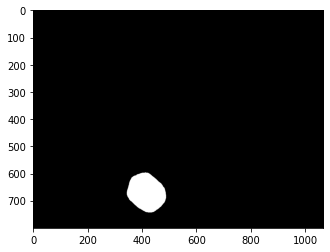

Drawing object of class: kiwi


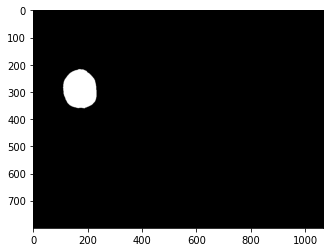

In [47]:
# Draw labels masks
for idx, label in enumerate(ann.labels):
    print(f"Drawing object of class: {label.obj_class.name}")
    label_mask = np.zeros(shape=img.shape)
    label.draw(bitmap=label_mask, color=label_color)
    # sly.image.write(f"./images/label_{idx}.png", label_mask) # uncomment to save image to disk

    fig.add_subplot(1, len(ann.labels), idx + 1)
    plt.imshow(label_mask / 255)

    plt.show()